In [1]:
import pandas as pd
df = pd.read_csv('Downloads\preprocessed_data.csv')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,1,1,228,36,1,1
1,0,61,0,0,1,3,2,202,28,2,1
2,1,80,0,1,1,1,2,105,32,2,1
3,0,49,0,0,1,1,1,171,34,3,1
4,0,79,1,0,1,3,2,174,24,2,1


In [2]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve
)

# Load dataset
df = pd.read_csv('Downloads/preprocessed_data.csv')

# Features and target
X = df.drop('stroke', axis=1)
y = df['stroke']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Logistic Regression - CV Accuracy: [0.95107632 0.95107632 0.95107632 0.95107632 0.95303327]
Mean CV Accuracy: 0.9514677103718199


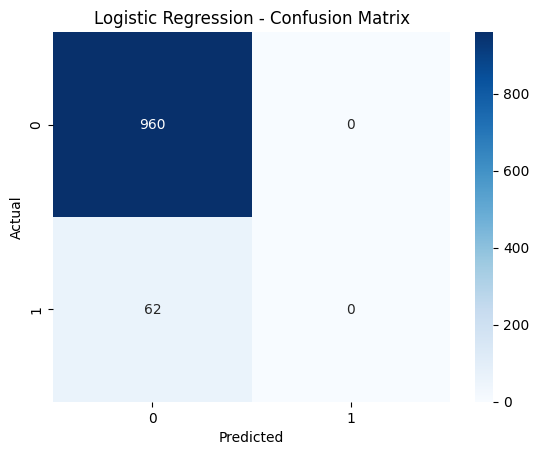

Accuracy: 0.9393346379647749
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


C:\Users\#DeZoysa\Documents\ImageProcessing\IM\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


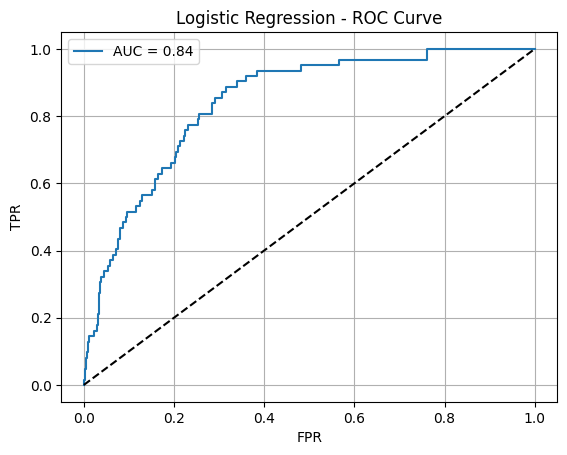

In [2]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

cv_scores = cross_val_score(model, X, y, cv=5)
print("Logistic Regression - CV Accuracy:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Logistic Regression - ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.grid()
plt.show()


Linear Regression - Cross-validation not used for classification


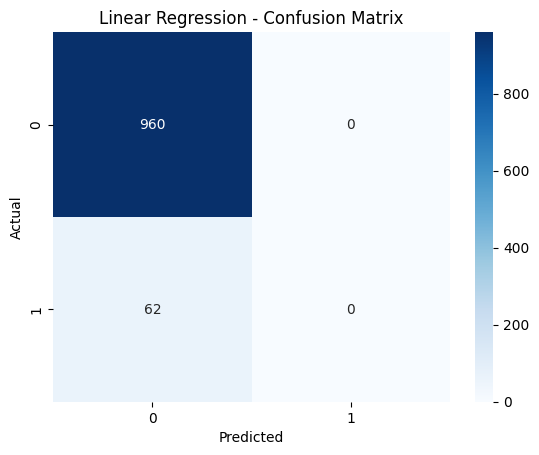

Accuracy: 0.9393346379647749
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


C:\Users\#DeZoysa\Documents\ImageProcessing\IM\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


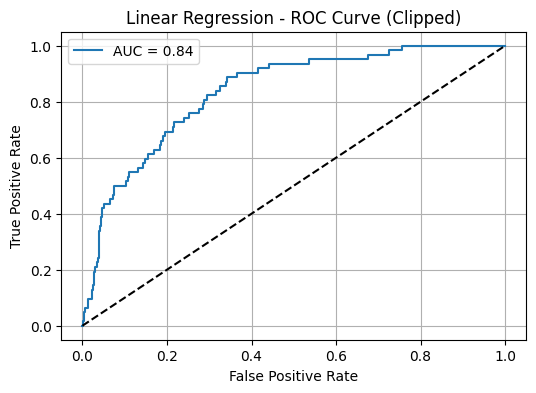

AUC Score: 0.8352318548387097


In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Linear Regression - Cross-validation not used for classification")

y_prob = model.predict(X_test)
y_pred = (y_prob >= 0.5).astype(int)

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Linear Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# ROC Curve
y_prob_clipped = np.clip(y_prob, 0, 1)

fpr, tpr, _ = roc_curve(y_test, y_prob_clipped)
auc = roc_auc_score(y_test, y_prob_clipped)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Linear Regression - ROC Curve (Clipped)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

print("AUC Score:", auc)


KNN - CV Accuracy: [0.94129159 0.94520548 0.94227006 0.94031311 0.94618395]
Mean CV Accuracy: 0.9430528375733855


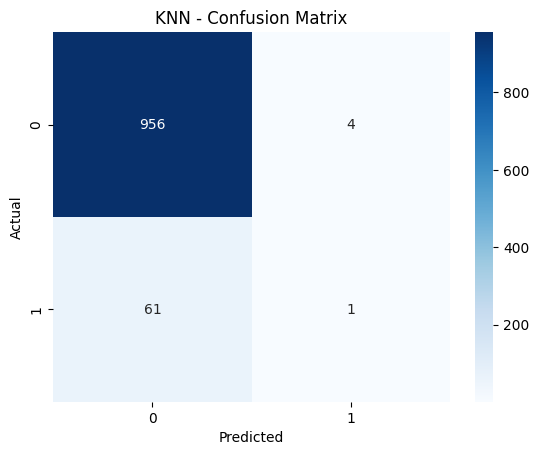

Accuracy: 0.9363992172211351
Precision: 0.2
Recall: 0.016129032258064516
F1 Score: 0.029850746268656716


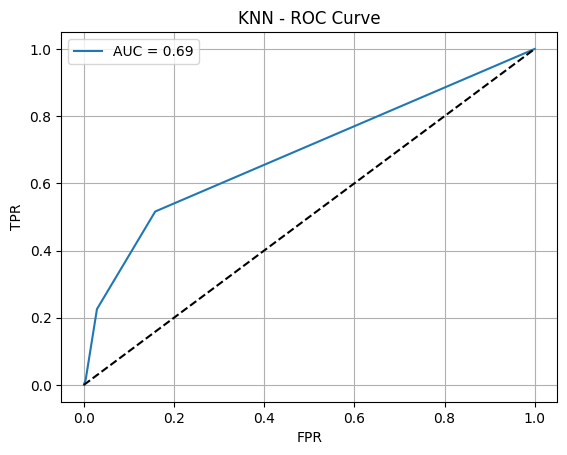

In [4]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

cv_scores = cross_val_score(model, X, y, cv=5)
print("KNN - CV Accuracy:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("KNN - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("KNN - ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.grid()
plt.show()


Decision Tree - CV Accuracy: [0.88943249 0.90900196 0.90117417 0.92270059 0.91291585]
Mean CV Accuracy: 0.9070450097847358


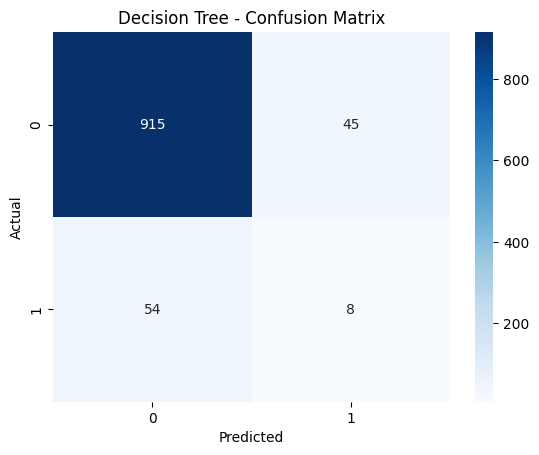

Accuracy: 0.9031311154598826
Precision: 0.1509433962264151
Recall: 0.12903225806451613
F1 Score: 0.1391304347826087


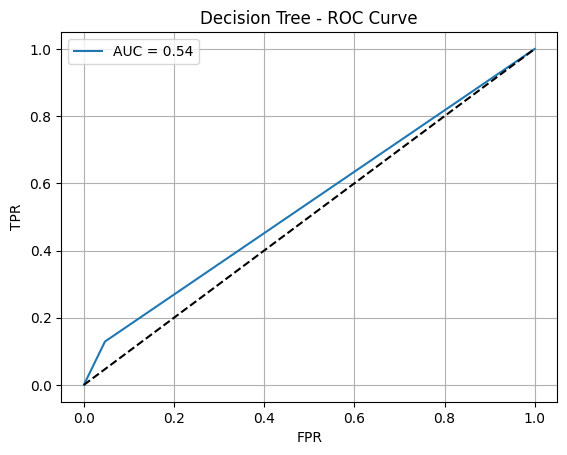

AUC Score: 0.541078629032258


In [5]:
# Initialize the model
model = DecisionTreeClassifier(random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)
print("Decision Tree - CV Accuracy:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Evaluation Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Decision Tree - ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.grid()
plt.show()

print("AUC Score:", auc)


Random Forest - CV Accuracy: [0.9481409  0.95107632 0.9481409  0.95107632 0.95009785]
Mean CV Accuracy: 0.949706457925636


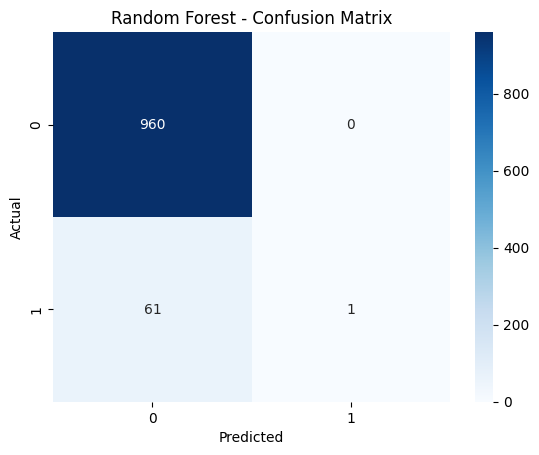

Accuracy: 0.9403131115459883
Precision: 1.0
Recall: 0.016129032258064516
F1 Score: 0.031746031746031744


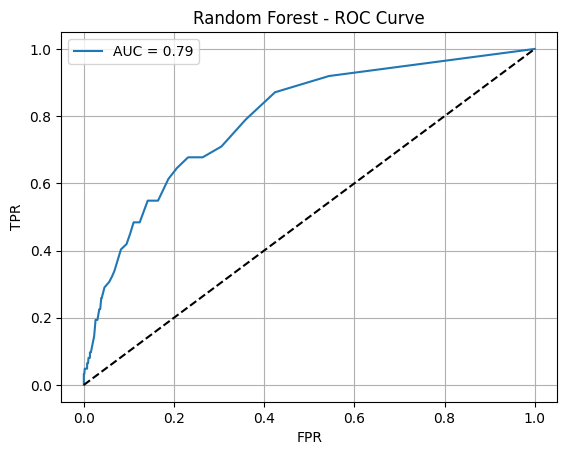

AUC Score: 0.7914482526881721


In [6]:
# Initialize the model
model = RandomForestClassifier(random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)
print("Random Forest - CV Accuracy:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Evaluation Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Random Forest - ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.grid()
plt.show()

print("AUC Score:", auc)


SVC - CV Accuracy: [0.95107632 0.95107632 0.95107632 0.95107632 0.95205479]
Mean CV Accuracy: 0.9512720156555773


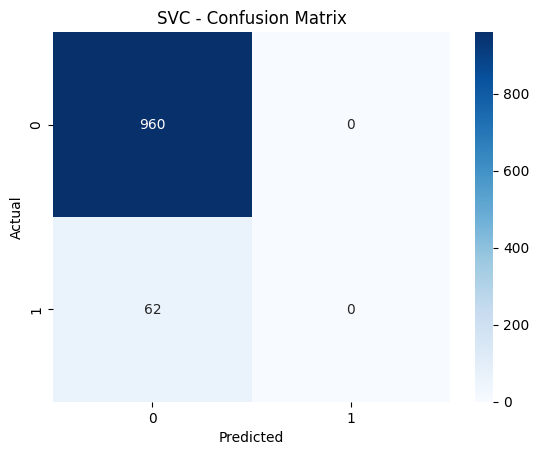

Accuracy: 0.9393346379647749
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


C:\Users\#DeZoysa\Documents\ImageProcessing\IM\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


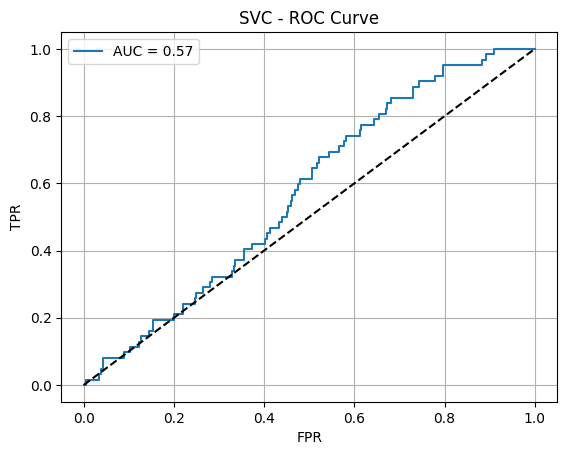

AUC Score: 0.5716229838709678


In [7]:
# Initialize the model
model = SVC(probability=True, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)
print("SVC - CV Accuracy:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("SVC - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Evaluation Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("SVC - ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.grid()
plt.show()

print("AUC Score:", auc)


C:\Users\#DeZoysa\Documents\ImageProcessing\IM\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:19:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\#DeZoysa\Documents\ImageProcessing\IM\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:19:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\#DeZoysa\Documents\ImageProcessing\IM\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:19:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.w

XGBoost - CV Accuracy: [0.94520548 0.94227006 0.93444227 0.94227006 0.93737769]
Mean CV Accuracy: 0.9403131115459882


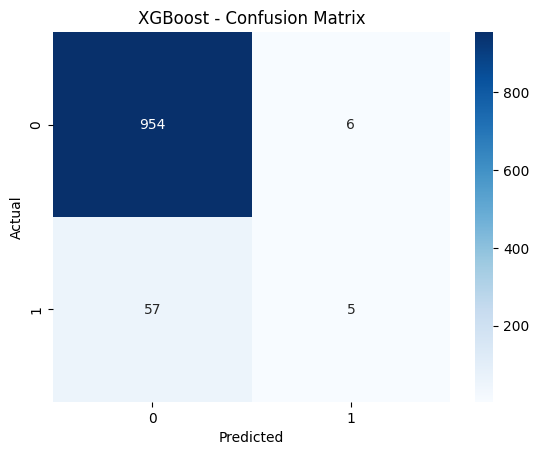

Accuracy: 0.9383561643835616
Precision: 0.45454545454545453
Recall: 0.08064516129032258
F1 Score: 0.136986301369863


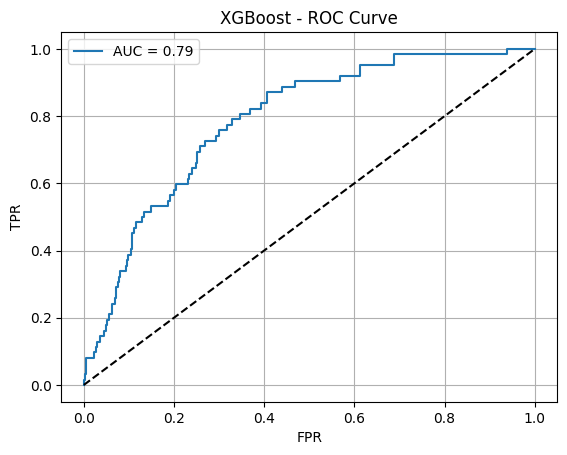

AUC Score: 0.787130376344086


In [8]:
# Initialize the model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)
print("XGBoost - CV Accuracy:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Evaluation Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("XGBoost - ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.grid()
plt.show()

print("AUC Score:", auc)

